# me 6.Z Homework 001

##### Source  = https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/06-trees/homework.md

In [1]:
import pandas as pda

import numpy as npy

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

C:\Users\alain\miniconda3\envs\mlzc\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
urlCsv = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
dfrHouRaw = pda.read_csv(urlCsv)
print(' shape = ' , dfrHouRaw.shape)
dfrHouRaw.head().T

 shape =  (20640, 10)


,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


### Prepare dfr Hou (Select fields + nan)

In [3]:
# from homework:
lstCol = [ 
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value' ,
'ocean_proximity'
]
lstCol

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [4]:
dfrHou = dfrHouRaw[lstCol]
dfrHou.head(8).T

,0,1,2,3,4,5,6,7
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [5]:
# do we have nulls ?
dfrHou.isnull().sum() [ dfrHou.isnull().sum() >= 1 ].sort_values(ascending=False)

total_bedrooms    207
dtype: int64

In [6]:
# Replace nan by 0
dfrHou.fillna(0, inplace=True)
dfrHou.isnull().sum() [ dfrHou.isnull().sum() >= 1 ].sort_values(ascending=False)

Series([], dtype: int64)

### median house value

In [7]:
dfrHou.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [8]:
dfrHou['median_house_value_l1p'] = npy.log1p(dfrHou['median_house_value'])
dfrHou.median_house_value_l1p.describe()

count    20640.000000
mean        12.084891
std          0.569131
min          9.615805
25%         11.691916
50%         12.099050
75%         12.486451
max         13.122367
Name: median_house_value_l1p, dtype: float64

### Split data

In [9]:
dfrTraFul, dfrTst = train_test_split(dfrHou, test_size=0.2, random_state=1)
dfrTra, dfrVal = train_test_split(dfrTraFul, test_size=0.25, random_state=1)
dfrHou.shape , dfrTraFul.shape , dfrTra.shape, dfrVal.shape, dfrTst.shape

((20640, 11), (16512, 11), (12384, 11), (4128, 11), (4128, 11))

In [10]:
# Reset all index
dfrTraFul = dfrTraFul.reset_index(drop=True)  
dfrTra = dfrTra.reset_index(drop=True)
dfrVal = dfrVal.reset_index(drop=True)
dfrTst = dfrTst.reset_index(drop=True)

### Save Target variable

In [11]:
# save Target
y_TraFul = dfrTraFul.median_house_value_l1p.values
y_Tra = dfrTra.median_house_value_l1p.values
y_Val = dfrVal.median_house_value_l1p.values
y_Tst = dfrTst.median_house_value_l1p.values

y_Tra[23:25]

array([11.50993099, 11.25287153])

### remove Targets 

In [12]:
# Remove target n all dfr
dfrTraFul.drop(['median_house_value', 'median_house_value_l1p'], axis=1 , inplace=True)
dfrTra.drop   (['median_house_value', 'median_house_value_l1p'], axis=1 , inplace=True)
dfrVal.drop   (['median_house_value', 'median_house_value_l1p'], axis=1 , inplace=True)
dfrTst.drop   (['median_house_value', 'median_house_value_l1p'], axis=1 , inplace=True)

In [13]:
dicTraFul = dfrTraFul.fillna(0).to_dict(orient='records')
dicTra = dfrTra.fillna(0).to_dict(orient='records')
dicVal = dfrVal.fillna(0).to_dict(orient='records')
dicTst = dfrTst.fillna(0).to_dict(orient='records')

dicTra[23:25]

[{'latitude': 37.93,
  'longitude': -121.19,
  'housing_median_age': 27.0,
  'total_rooms': 1621.0,
  'total_bedrooms': 363.0,
  'population': 909.0,
  'households': 345.0,
  'median_income': 2.1513,
  'ocean_proximity': 'INLAND'},
 {'latitude': 39.47,
  'longitude': -122.1,
  'housing_median_age': 43.0,
  'total_rooms': 1320.0,
  'total_bedrooms': 215.0,
  'population': 512.0,
  'households': 197.0,
  'median_income': 2.4917,
  'ocean_proximity': 'INLAND'}]

In [14]:
dvt = DictVectorizer(sparse=False)

In [15]:
X_TraFul = dvt.fit_transform(dicTraFul)
X_Tra    = dvt.fit_transform(dicTra)

X_Val = dvt.transform(dicVal)
X_Tst = dvt.transform(dicTst)

X_Tra[23:25]

array([[ 3.4500e+02,  2.7000e+01,  3.7930e+01, -1.2119e+02,  2.1513e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         9.0900e+02,  3.6300e+02,  1.6210e+03],
       [ 1.9700e+02,  4.3000e+01,  3.9470e+01, -1.2210e+02,  2.4917e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         5.1200e+02,  2.1500e+02,  1.3200e+03]])

In [16]:
lstFea = dvt.get_feature_names_out().tolist()
lstFea

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

# Q1: Decision Tree Regressor

In [17]:
dtr = DecisionTreeRegressor(max_depth=1)

In [18]:
dtr.fit(X_Tra, y_Tra)

DecisionTreeRegressor(max_depth=1)

In [19]:
# see Tree
print(export_text(dtr, feature_names=dvt.get_feature_names_out().tolist()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



## Q1 = 'ocean_proximity=INLAND'

# Q2: Random Forest Regressor

In [20]:
rfr = RandomForestRegressor(n_estimators=10 ,
                            random_state=1 ,
                            n_jobs=-1)

rfr.fit(X_Tra, y_Tra)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
y_prdVal = rfr.predict(X_Val)

In [22]:
# Calc RMSE with sickit
floMse = mean_squared_error(y_Val, y_prdVal) 
floMse

0.060387333376864104

In [23]:
floRmse = npy.sqrt(floMse)
floRmse

0.2457383433183843

## Q2 = 0.23 (0.25?)

# Q3: play with n-estimators

In [24]:
lstEst = range(10,201,10)

In [25]:
dfrRes = pda.DataFrame(columns=['Mse' , 'SqrMse'])

for est in tqdm(lstEst):
    rfr = RandomForestRegressor(n_estimators=est ,
                            random_state=1 ,
                            n_jobs=-1)

    rfr.fit(X_Tra, y_Tra)
    y_prdVal = rfr.predict(X_Val)
    floMse = mean_squared_error(y_Val, y_prdVal) 
    #print(est , ' => ' , floMse , '-' , npy.sqrt(floMse) )
    dfrRes.loc[est] = [floMse , npy.sqrt(floMse)]

  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
dfrRes.sort_values(by=['SqrMse'], ascending=True)

,Mse,SqrMse
110,0.053601,0.231518
120,0.053648,0.231621
170,0.053652,0.231629
200,0.053662,0.231650
140,0.053681,0.231692
150,0.053682,0.231694
160,0.053684,0.231697
130,0.053689,0.231710
190,0.053714,0.231762
180,0.053727,0.231790


(0.23, 0.24)

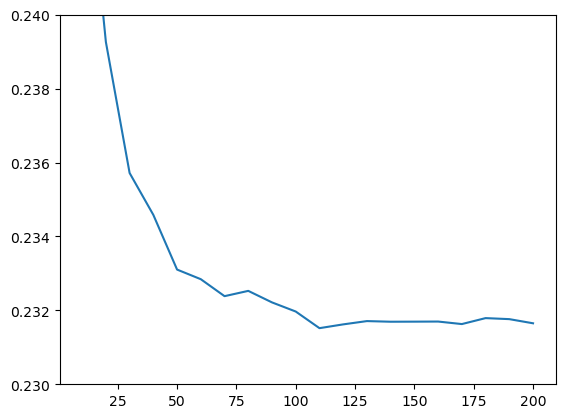

In [27]:
plt.plot(dfrRes.index.values, dfrRes.SqrMse )
plt.ylim(0.230, 0.240)

## Reaching plateau after +/- 125..150
## Q3 = 150

# Q4: max_depth

In [28]:
lstDpt = [10, 15, 20, 25]

In [29]:
dfrRes = pda.DataFrame(columns=['MaxDpt' ,'Est' , 'Mse' , 'SqrMse'])

for dpt in tqdm(lstDpt):
    for est in tqdm(lstEst):
        rfr = RandomForestRegressor(n_estimators=est ,
                                    random_state=1 ,
                                    max_depth = dpt ,  
                                    n_jobs=-1)

        rfr.fit(X_Tra, y_Tra)

        y_prdVal = rfr.predict(X_Val)
        floMse = mean_squared_error(y_Val, y_prdVal) 
        
        #print(dpt , '-' , est , ' => ' , floMse , '-' , npy.sqrt(floMse) )
        dfrRes.loc[len(dfrRes)] = [dpt, est , floMse , npy.sqrt(floMse)]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [30]:
len(dfrRes) , dfrRes.shape

(80, (80, 4))

In [31]:
dfrRes.sort_values(by=['SqrMse'], ascending=True)

,MaxDpt,Est,Mse,SqrMse
70,25.0,110.0,0.053479,0.231255
71,25.0,120.0,0.053498,0.231297
76,25.0,170.0,0.053565,0.231440
73,25.0,140.0,0.053573,0.231458
75,25.0,160.0,0.053585,0.231484
...,...,...,...,...
4,10.0,50.0,0.062596,0.250192
3,10.0,40.0,0.063032,0.251062
2,10.0,30.0,0.063326,0.251647
1,10.0,20.0,0.063900,0.252784


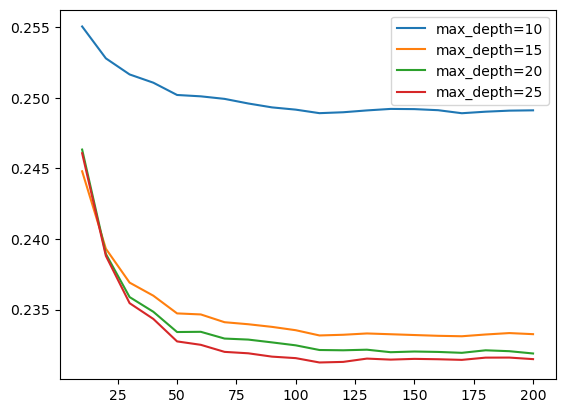

In [32]:
for dpt in lstDpt:
    dfrResDpt = dfrRes[dfrRes.MaxDpt == dpt]
    plt.plot(dfrResDpt.Est, dfrResDpt.SqrMse , label = 'max_depth=%d' % dpt  )
plt.legend()

## Q4: best max_depth=25

# Q5 feature_importances_

In [33]:
# train again with params from homework
rfr = RandomForestRegressor(n_estimators=10, max_depth=20,
                            random_state=1, n_jobs=-1 )
   
rfr.fit(X_Tra, y_Tra)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [34]:
arrFeI = rfr.feature_importances_
arrFeI , len(arrFeI)

(array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
        3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
        4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
        2.05364687e-02]),
 13)

In [35]:
lstFeI = arrFeI.tolist()
lstFeI

[0.01695731830740333,
 0.03309389968532549,
 0.10133397120516323,
 0.09626498762322835,
 0.3629129067227312,
 0.003007237495106814,
 0.31090084170805665,
 0.000356806262947593,
 0.00044866197239988755,
 0.004227624463177561,
 0.030918019662506523,
 0.019041256180901026,
 0.020536468711052403]

In [36]:
dfrFea = pda.DataFrame( {'Feature': lstFea , 'FeatureImportance' : lstFeI} )
dfrFea.sort_values(by=['FeatureImportance'], ascending=False)

,Feature,FeatureImportance
4,median_income,0.362913
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101334
3,longitude,0.096265
1,housing_median_age,0.033094
10,population,0.030918
12,total_rooms,0.020536
11,total_bedrooms,0.019041
0,households,0.016957
9,ocean_proximity=NEAR OCEAN,0.004228


## Q5:  'median_income' with 0.362913 

# Q6: XGBoost (eta variation)

In [51]:
lstFea

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [52]:
lstFeaCor = [ fea.replace("<", "_le_") for fea in lstFea]
lstFeaCor

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=_le_1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [53]:
# dma for Xgboost
dmaTra = xgb.DMatrix(X_Tra, label=y_Tra, feature_names=lstFeaCor)
dmaVal = xgb.DMatrix(X_Val, label=y_Val, feature_names=lstFeaCor)

In [54]:
watchlist = [(dmaTra, 'train'), (dmaVal, 'val')]

In [55]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

modXgb = xgb.train(xgb_params, 
                   dmaTra, 
                   num_boost_round=100 ,
                   evals=watchlist ,
                   verbose_eval=1
                  )

[0]	train-rmse:8.12733	val-rmse:8.13245
[1]	train-rmse:5.69586	val-rmse:5.70070
[2]	train-rmse:3.99539	val-rmse:4.00041
[3]	train-rmse:2.80712	val-rmse:2.81079
[4]	train-rmse:1.97833	val-rmse:1.98175
[5]	train-rmse:1.40218	val-rmse:1.40741
[6]	train-rmse:1.00099	val-rmse:1.00700
[7]	train-rmse:0.72751	val-rmse:0.73439
[8]	train-rmse:0.54190	val-rmse:0.55047
[9]	train-rmse:0.42167	val-rmse:0.43234
[10]	train-rmse:0.34481	val-rmse:0.35782
[11]	train-rmse:0.29835	val-rmse:0.31360
[12]	train-rmse:0.27095	val-rmse:0.28864
[13]	train-rmse:0.25268	val-rmse:0.27335
[14]	train-rmse:0.24295	val-rmse:0.26605
[15]	train-rmse:0.23555	val-rmse:0.26044
[16]	train-rmse:0.22630	val-rmse:0.25229
[17]	train-rmse:0.22232	val-rmse:0.24902
[18]	train-rmse:0.22029	val-rmse:0.24826
[19]	train-rmse:0.21791	val-rmse:0.24696
[20]	train-rmse:0.21580	val-rmse:0.24624
[21]	train-rmse:0.21160	val-rmse:0.24334
[22]	train-rmse:0.20975	val-rmse:0.24245
[23]	train-rmse:0.20904	val-rmse:0.24269
[24]	train-rmse:0.20703	va

In [56]:
y_prdVal = modXgb.predict(dmaVal)

In [57]:
y_Val , y_prdVal

(array([12.56898162, 13.12236738, 11.11989769, ..., 12.81963805,
        12.29087784, 12.1884228 ]),
 array([12.785514 , 13.082328 , 11.485188 , ..., 12.787802 , 12.4473295,
        12.275799 ], dtype=float32))

In [58]:
# Calc RMSE with sickit
floMse = mean_squared_error(y_Val, y_prdVal) 
floSqrMse = npy.sqrt(floMse)
floMse , floSqrMse

(0.05111930390108557, 0.2260957847928297)

In [59]:
lstEta = [0.01 , 0.1 , 0.3 ]
lstEta

[0.01, 0.1, 0.3]

In [110]:
for eta in lstEta:
    print('---<<beg>>---\n{eta:' , eta , '}')
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    modXgb = xgb.train(xgb_params, 
                       dmaTra, 
                       num_boost_round=100 ,
                       evals=watchlist ,
                       verbose_eval=10
                      )
    y_prdVal = modXgb.predict(dmaVal)
    
    floMse = mean_squared_error(y_Val, y_prdVal) 
    floSqrMse = npy.sqrt(floMse)
    print('---<<res ; floMse=' , floMse , '; floSqrMse=' , floSqrMse , '; >>---\n---<<end>>---')

---<<beg>>---
{eta: 0.01 }
[0]	train-rmse:11.48634	val-rmse:11.49225
[10]	train-rmse:10.38969	val-rmse:10.39532
[20]	train-rmse:9.39796	val-rmse:9.40346
[30]	train-rmse:8.50110	val-rmse:8.50645
[40]	train-rmse:7.69008	val-rmse:7.69524
[50]	train-rmse:6.95672	val-rmse:6.96171
[60]	train-rmse:6.29360	val-rmse:6.29841
[70]	train-rmse:5.69400	val-rmse:5.69854
[80]	train-rmse:5.15187	val-rmse:5.15621
[90]	train-rmse:4.66171	val-rmse:4.66589
[99]	train-rmse:4.26092	val-rmse:4.26496
---<<res ; floMse= 18.189893628482622 ; floSqrMse= 4.264961152048471 ; >>---
---<<end>>---
---<<beg>>---
{eta: 0.1 }
[0]	train-rmse:10.44371	val-rmse:10.44938
[10]	train-rmse:3.65741	val-rmse:3.66135
[20]	train-rmse:1.30499	val-rmse:1.31054
[30]	train-rmse:0.51144	val-rmse:0.52189
[40]	train-rmse:0.27985	val-rmse:0.30053
[50]	train-rmse:0.22614	val-rmse:0.25334
[60]	train-rmse:0.21035	val-rmse:0.24189
[70]	train-rmse:0.20116	val-rmse:0.23684
[80]	train-rmse:0.19384	val-rmse:0.23398
[90]	train-rmse:0.18794	val-rmse

In [114]:
#modXgb.save_model('modXgb.json')

## Q6 : eta=0.3 is slightly better than 0.1 !

## Repeat same but playing with output to plot   (full verbose)

In [105]:
%%capture output

for eta in lstEta:
    print('---<<beg>>---\n{eta:' , eta , '}')
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    modXgb = xgb.train(xgb_params, 
                       dmaTra, 
                       num_boost_round=100 ,
                       evals=watchlist ,
                       verbose_eval=1
                      )
    y_prdVal = modXgb.predict(dmaVal)
    
    floMse = mean_squared_error(y_Val, y_prdVal) 
    floSqrMse = npy.sqrt(floMse)
    print('---<<res ; floMse=' , floMse , '; floSqrMse=' , floSqrMse , '; >>---\n---<<end>>---')

In [106]:
strOut = output.stdout

dfrRes = pda.DataFrame(columns=['eta' ,'bos' , 'train-rmse' , 'val-rmse' , 'mse' , 'sqrmse' ])

strBeg = '---<<beg>>--'
strEnd = '---<<end>>--'

intBeg = 0
intEnd = 0

while True:

    intBeg = strOut.find(strBeg, intEnd) 

    if intBeg < 0 :
        print('---Reached end! ---')
        break
    else:
        intBeg = intBeg + len(strBeg)

    intEnd = strOut.find(strEnd, intBeg)
    print(intBeg, intEnd)
    
    strBlk = strOut[intBeg:intEnd]
    
    eta = strBlk[ strBlk.find('{')+2 : strBlk.find('}')].split(':')[1]
    print(eta)
    
    lstRes = strBlk[strBlk.find('---<<res'):].split(';')
    #print(lstRes[1].split('='))
    #print(lstRes[2].split('='))
                                                    
    lstLin = strBlk[strBlk.find('}')+2: strBlk.find('---<<res') -1 ].split('\n')
    for lin in lstLin:
        lstStr = lin.split('\t')
        
        bos = lstStr[0][lstStr[0].find('[')+1: lstStr[0].find(']') ]
        
        #print('lstStr = ' ,lstStr[1].split(':')[0])
        #print('lstStr = ' ,lstStr[1].split(':')[1])

        #print('lstStr = ' ,lstStr[2].split(':')[0])
        #print('lstStr = ' ,lstStr[2].split(':')[1])
        
        dfrRes.loc[len(dfrRes)] = [ float(eta) , int(bos) , 
                                   float(lstStr[1].split(':')[1]) , 
                                   float(lstStr[2].split(':')[1]) , 
                                   float(lstRes[1].split('=')[1]) , 
                                   float(lstRes[2].split('=')[1])   ]


12 4222
 0.01 
4248 8433
 0.1 
8459 12642
 0.3 
---Reached end! ---


In [107]:
dfrRes

,eta,bos,train-rmse,val-rmse,mse,sqrmse
0,0.01,0.0,11.48634,11.49225,18.189894,4.264961
1,0.01,1.0,11.37165,11.37753,18.189894,4.264961
2,0.01,2.0,11.25810,11.26397,18.189894,4.264961
3,0.01,3.0,11.14569,11.15153,18.189894,4.264961
4,0.01,4.0,11.03441,11.04022,18.189894,4.264961
...,...,...,...,...,...,...
295,0.30,95.0,0.13553,0.22630,0.051119,0.226096
296,0.30,96.0,0.13458,0.22620,0.051119,0.226096
297,0.30,97.0,0.13372,0.22608,0.051119,0.226096
298,0.30,98.0,0.13344,0.22611,0.051119,0.226096


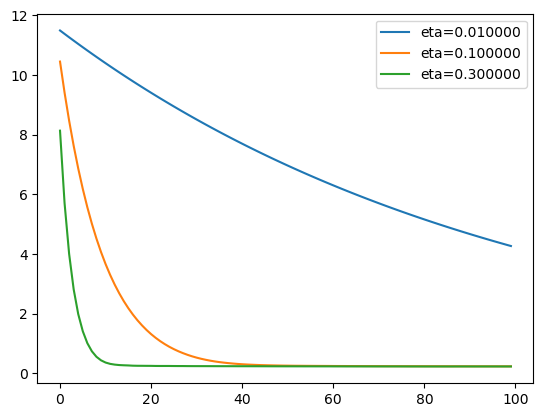

In [108]:
for eta in lstEta:
    dfrResEta = dfrRes[dfrRes.eta == eta]
    plt.plot(dfrResEta.bos, dfrResEta['val-rmse'] , label = 'eta=%f' % eta )
plt.legend()

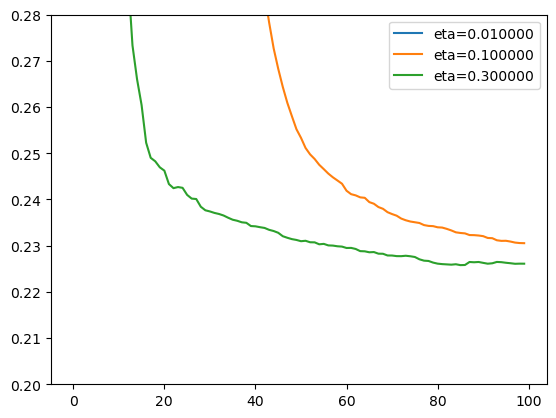

In [109]:
for eta in lstEta:
    dfrResEta = dfrRes[dfrRes.eta == eta]
    plt.plot(dfrResEta.bos, dfrResEta['val-rmse'] , label = 'eta=%f' % eta )
plt.ylim(0.20, .28)
plt.legend()

# Q6: 0.3 is slightly better (and converge faster)